In [1]:
from projet_etu import *
import matplotlib.pyplot as plt
from utils.mltools import *
from sklearn.model_selection import train_test_split

In [2]:
a = 42
b = 7
X = np.random.uniform(-5, 5, 200).reshape((-1, 1))
y = a * X + b + (np.random.uniform(-100, 100, 200).reshape((-1, 1)))
n = X.shape[1]
d = 1

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


iter = 100
gradient_step = 1e-4
loss = MSELoss()
layer = Linear(n, d)

# Training the model and collecting losses
train_losses = []
val_losses = []
for _ in range(iter):
    # Forward pass
    y_train_pred = layer.forward(X_train)
    y_val_pred = layer.forward(X_val)
    
    # Compute loss
    train_loss = loss.forward(y_train, y_train_pred).mean()
    val_loss = loss.forward(y_val, y_val_pred).mean()
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Backward pass
    loss_back = loss.backward(y_train, y_train_pred)
    delta_linear = layer.backward_delta(X_train, loss_back)
    layer.backward_update_gradient(X_train, loss_back)
    
    # Update parameters
    layer.update_parameters(gradient_step=gradient_step)
    layer.zero_grad()

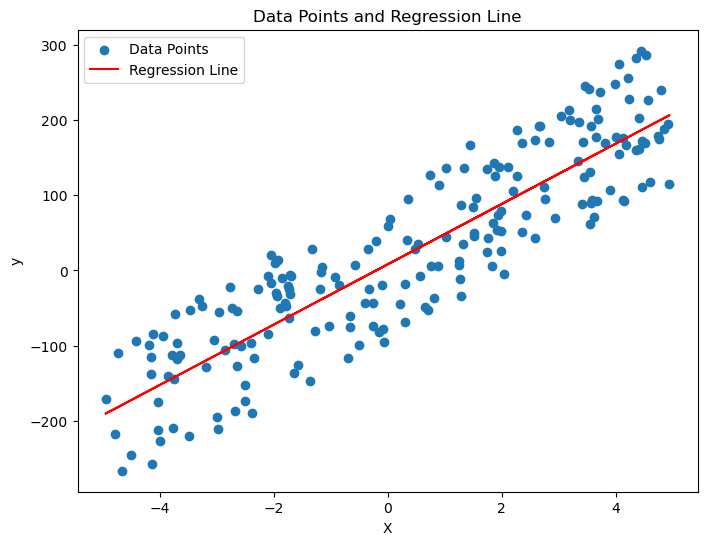

In [3]:
# Plotting the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
y_pred = layer.forward(X)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Points and Regression Line')
plt.legend()

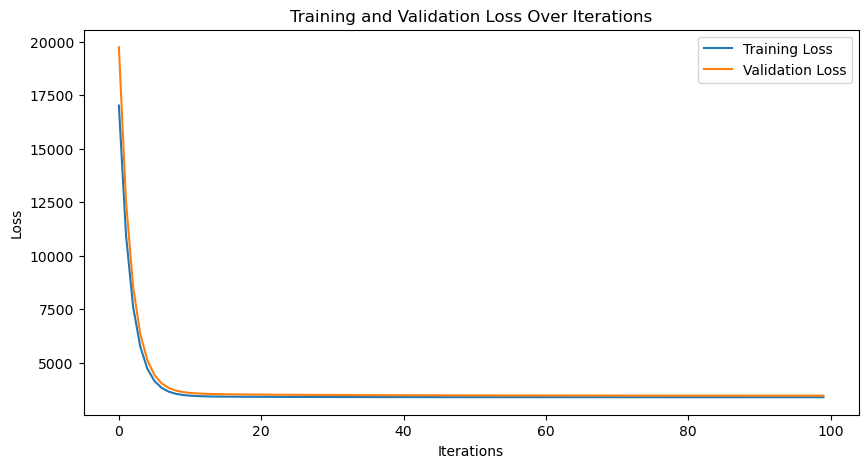

In [4]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Iterations')
plt.legend()
plt.show()

### Classification

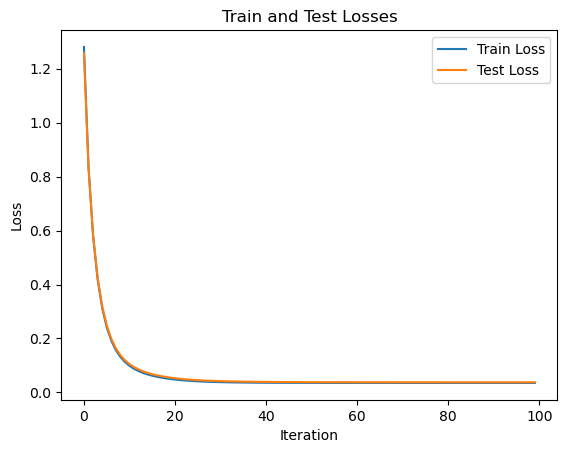

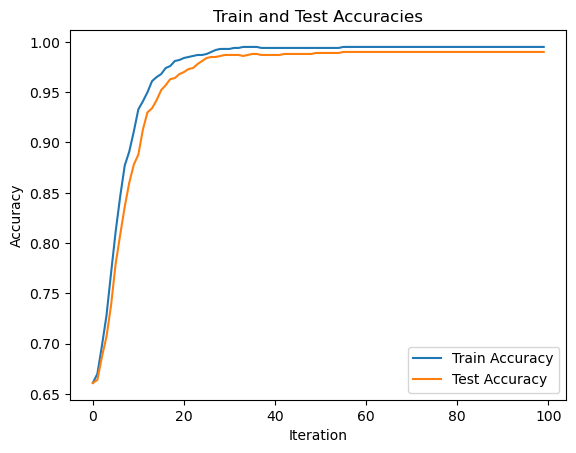

Accuracy en train : 0.995
Accuracy en test : 0.99


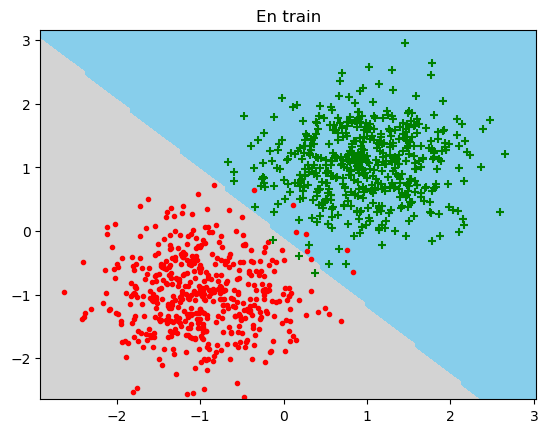

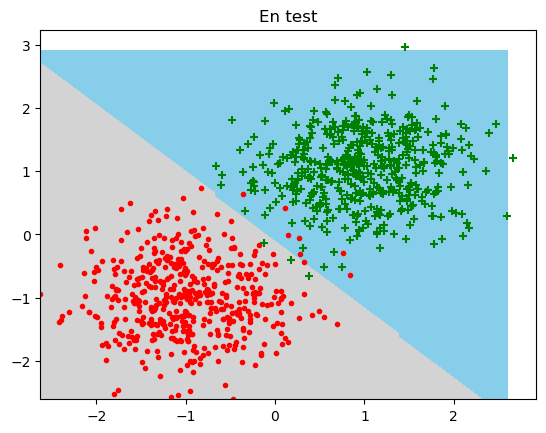

In [6]:
X_train, y_train = gen_arti(nbex=1000, data_type=0, epsilon=0.5)
X_test, y_test = gen_arti(nbex=1000, data_type=0, epsilon=0.5)
n = X_train.shape[1]
d = 1

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

# Parameters
iteration = 100
gradient_step = 1e-4
loss = MSELoss()
layer = Linear(n, d, bias=True)

# Lists to store losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training algorithm
for _ in range(iteration):
    # Forward pass
    hidden_train = layer.forward(X_train)
    hidden_test = layer.forward(X_test)
    
    # Calculate and store losses
    train_loss = loss.forward(y_train, hidden_train)
    test_loss = loss.forward(y_test, hidden_test)
    train_losses.append(train_loss.mean())
    test_losses.append(test_loss.mean())
    
    # Calculate and store accuracies
    train_accuracy = (y_train == np.where(hidden_train >= 0.5, 1, 0)).mean()
    test_accuracy = (y_test == np.where(hidden_test >= 0.5, 1, 0)).mean()
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Backward pass
    loss_back = loss.backward(y_train, hidden_train)
    delta_linear = layer.backward_delta(X_train, loss_back)
    layer.backward_update_gradient(X_train, loss_back)
    layer.update_parameters(gradient_step=gradient_step)
    layer.zero_grad()

# Prediction function
def predict(X):
    hidden = layer.forward(X)
    return np.where(hidden >= 0.5, 1, 0)

# Plotting train and test losses
plt.figure()
plt.plot(np.arange(iteration), train_losses, label='Train Loss')
plt.plot(np.arange(iteration), test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

# Plotting train and test accuracies
plt.figure()
plt.plot(np.arange(iteration), train_accuracies, label='Train Accuracy')
plt.plot(np.arange(iteration), test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies')
plt.legend()
plt.show()

# Final accuracy
score_train = (y_train == predict(X_train)).mean()
score_test = (y_test == predict(X_test)).mean()
print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")

# Plot decision boundaries
plot_frontiere(X_train, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En train")
plt.show()

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("En test")
plt.show()